In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

# Load the IMDB dataset from CSV
df = pd.read_csv("IMDB Dataset.csv")

In [18]:
# Preprocess the data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=100)
print(X)

[[ 123  210 3241 ...  125 4103  486]
 [ 175 3336   96 ... 1977   69  221]
 [  10  190    9 ...   63   16  350]
 ...
 [   7   30   86 ...    2    2 6050]
 [8462 5548    2 ...   67  739   42]
 [ 116  699  479 ...  794   11   17]]


In [19]:
# Convert labels to numerical values
y = df['sentiment'].map({'positive': 1, 'negative': 0}).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 100)
(10000, 100)
(40000,)
(10000,)


In [20]:
# Build the model
model = Sequential()
model.add(Embedding(10000, 32, input_length=100))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6550 - loss: 0.6118 - val_accuracy: 0.8509 - val_loss: 0.3375
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8905 - loss: 0.2772 - val_accuracy: 0.8631 - val_loss: 0.3119
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9369 - loss: 0.1835 - val_accuracy: 0.8619 - val_loss: 0.3177
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.1096 - val_accuracy: 0.8572 - val_loss: 0.3402
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9929 - loss: 0.0573 - val_accuracy: 0.8539 - val_loss: 0.3663
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0286 - val_accuracy: 0.8514 - val_loss: 0.3966
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9995 - loss: 0.0165 - val_accuracy: 0.8522 - val_loss: 0.4210
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 0.0099 - val_accuracy: 0.

In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [22]:
acc = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']

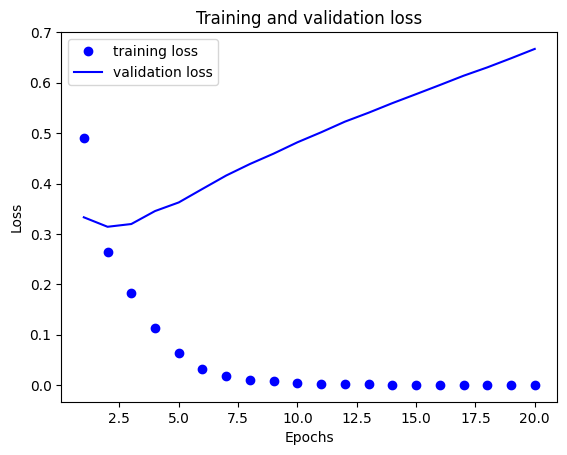

In [23]:
#plotting training and validation loss
import matplotlib.pyplot as plt
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss,'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

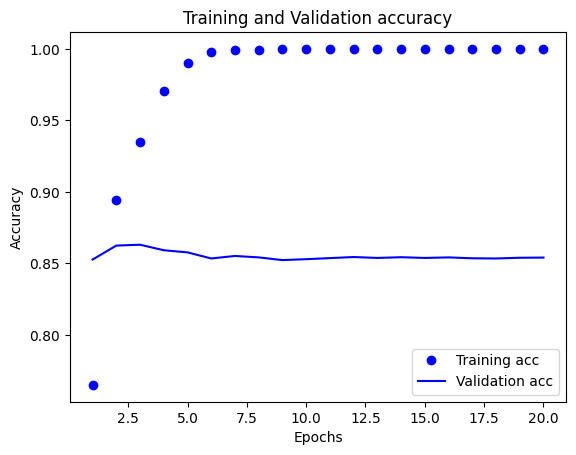

In [26]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [25]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.8453 - loss: 0.6640
Test Accuracy: 0.8499000072479248
